In [3]:
import warnings
warnings.filterwarnings('ignore')

import os 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 
import scipy.misc
import skimage.segmentation
import skimage.feature

from copy import copy
from IPython.display import HTML

In [4]:
base_dir = "/home/arif/Arif/Private/kaggle/pneumonia/rcnn"
img_dir = os.path.join(base_dir,"app/assets/data/stage_2_train_images_png")
img_dir

'/home/arif/Arif/Private/kaggle/pneumonia/rcnn/app/assets/data/stage_2_train_images_png'

# Step 1: Create initial regions by Felzenszwalb’s efficient graph based segmentation algorithm

J.R.R. Uijlings's graph segmentation is an unsupervised method to partition the image into several regions. 
It uses the graph representation of an image.
In graph formulation, each pixel intensity is vertice and the pair of the adjacent pixels is edge (See Figure that 
I took from [Shih-Shinh Huang's youtube tutorial: quarter DIP Efficient Graph Based Image Segmentation](https://www.youtube.com/watch?v=iDKeR_swA8g)).

Weight measures the strength of the edge, and the absolute difference of intensities is used as a weight.
Then the pixels should be combined into the same group with the idea that: 

- edges between two vertices in the same group should have lower weights
- edges between two vertices in the different group should have higher weights 

![Shih-Shinh Huang's youtube tutorial](https://farm5.staticflickr.com/4873/44926733935_eae0a6373d_k.jpg)
### Youtube
(Credit: [Shih-Shinh Huang's youtube tutorial: quarter DIP Efficient Graph Based Image Segmentation](https://www.youtube.com/watch?v=iDKeR_swA8g))

Thankfully, [skimage.segmentation: Comparison of segmentation and superpixel algorithms](http://scikit-image.org/docs/dev/auto_examples/segmentation/plot_segmentations.html#sphx-glr-auto-examples-segmentation-plot-segmentations-py) already implemented Felzenszwalb and Huttenlocher's segmentation algorithm. 
So we will use this implemented algorithm. 

Let's try it out and visualize the segmented images.
The following codes randomly select 5 frames from PASCAL data and visualize its original image and segmented image.

https://fairyonice.github.io/Object_detection_with_PASCAL_VOC2012_selective_search.html

['ed0c5d1e-934a-4e31-9221-3a6a69ec9c1b.png']
(1024, 1024, 2)


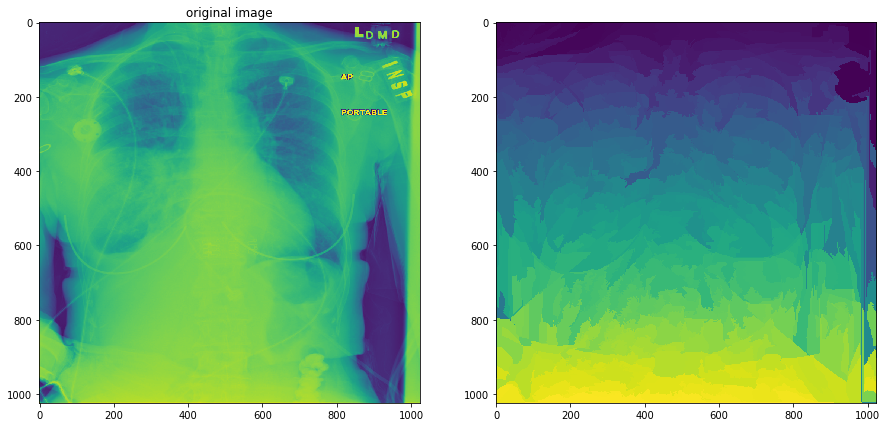

In [21]:
def image_segmentation(img_8bit, scale = 1.0, sigma = 0.8, min_size = 50):
    '''
    J.R.R. Uijlings's hierarchical grouping algorithm 
    
    == input ==
    img_8bit : shape = (height, width, 3),
               8-bits degital image (each digit ranges between 0 - 255)
    
    == output ==
    img      : shape = (height, width, 4)
    '''
    # convert the image to range between 0 and 1
    img_float = skimage.util.img_as_float(img_8bit)
    im_mask   = skimage.segmentation.felzenszwalb(
                    img_float, 
                    scale    = scale, 
                    sigma    = sigma,
                    min_size = min_size)
    img       = np.dstack([img_8bit,im_mask])
    return(img)

scale    = 1.0
sigma    = 0.8
# min_size may be around 50 for better RCNN performance but for the sake of visualization, I will stick to min_size =500
min_size = 500 # 500 3000

np.random.seed(1)
listed_path = os.listdir(img_dir)
Nplot = 1
# random_img_path = np.random.choice(listed_path,Nplot)
randop_img_path = '/home/arif/Arif/Private/kaggle/pneumonia/rcnn/app/assets/data/stage_2_train_images_png/0a9c4c04-5918-48da-9ba1-b2a3add66ae9.png'
print(random_img_path)
for imgnm in random_img_path:
    # import 8 bits degital image (each digit ranges between 0 - 255)
    img_8bit  = scipy.misc.imread(os.path.join(img_dir,imgnm))
    img       = image_segmentation(img_8bit, scale, sigma, min_size)
    print((img.shape))
    
    fig = plt.figure(figsize=(15,30))
    ax  = fig.add_subplot(1,2,1)
    ax.imshow(img_8bit)
    ax.set_title("original image")
    ax  = fig.add_subplot(1,2,2)
    ax.imshow(img[:,:,1])
#     ax.set_title("skimage.segmentation.felzenszwalb, N unique region = {}".format(len(np.unique(img[:,:,3]))))
    plt.show()

In [2]:
import numpy as np

a3 = np.array([[[10, 11, 12], [13, 14, 15], [16, 17, 18]],
               [[20, 21, 22], [23, 24, 25], [26, 27, 28]],
               [[30, 31, 32], [33, 34, 35], [36, 37, 38]]])
a3[:,:,1]

array([[11, 14, 17],
       [21, 24, 27],
       [31, 34, 37]])